<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/count_significanse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import files
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

uploaded = files.upload()

Saving Vannskade_år_count.xlsx to Vannskade_år_count.xlsx


In [ ]:
kol = ['Produktkode','Skadedato','År','Årsak','Ant']

data = pd.read_excel('Vannskade_år_count.xlsx',skiprows=0,names=kol)
data.drop(data.loc[data['År']<2000].index, inplace=True) #fjerner år mindre nn 2000
data.fillna(0)

In [5]:
år = list(set(data['År'].values))


In [15]:
# summere ant skadenummer per år per skadeårsak
#sum_list = []
dt = pd.DataFrame(columns=['Vann utenfra','Frost','Tilstopping'])
cols = ['Frost', 'Tilstopping','Vann utenfra']
#år = np.arange(2000,2021,1)
for i in cols:
  årlig = []
  for j in år:
    df = data.loc[(data['Årsak']==i) & (data['År']==j)]['Ant'].sum()
    årlig.append(df)
  #sum_list.append(årlig)
  dt[str(i)] = årlig

In [ ]:
dt

In [ ]:
data.loc[(data['År']==2016) & (data['Årsak']=='Frost'),'Ant'].sum() #ant skalder for gitt år og skade

116

In [ ]:
#dt.to_excel("output_test.xlsx") #lag xcelfil 

# Beregne trend på nytt inkl skadeant

In [7]:
uploaded = files.upload()
#fno_værrelatert_vannskade_2000-2020.csv 


Saving fno_værrelatert_vannskade_2000-2020.csv to fno_værrelatert_vannskade_2000-2020.csv


In [ ]:
kol = ['år','årsak','skade']
vær = pd.read_csv('fno_værrelatert_vannskade_2000-2020.csv',sep=',',skiprows=1,names=kol)
vær

In [17]:
#summere skader
dtt = pd.DataFrame(columns=['Vann utenfra','Frost','Tilstopping'])
cols = ['Frost', 'Tilstopping','Vann utenfra']
år = np.arange(2000,2021,1)
for i in cols:
  årlig = []
  for j in år:
    df = vær.loc[(vær['årsak']==i) & (vær['år']==j)]['skade'].sum()
    årlig.append(df)
  #sum_list.append(årlig)
  dtt[str(i)] = årlig

In [ ]:
dtt['Frost']

In [37]:
#lineær regresjon for trend
pred = []
stigning = []
for i,j  in enumerate(cols):
  reg = LinearRegression()
  nkost = np.array(dtt[cols[i]]/dt[cols[i]]).reshape(-1,1)
  når = år.reshape(-1,1)
  a = reg.fit(når,nkost)
  predictions = reg.predict(når)
  pred.append(predictions)
  #print(predictions)
  stigning.append(round(reg.coef_[0][0],2))
  print(reg.coef_[0][0])

1989.5907220565236
968.3561320556355
784.4230559224561


In [22]:
print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")

The slope is 1839159.903272727 and the intercept is -3674574482.711991


In [25]:
grønn = '#84BD00'
blå = '#60C3E6'
grå = '#6E6259'
blå1='#3396b9'
rød='#7f3035'
sjøgrønn='#004f59'

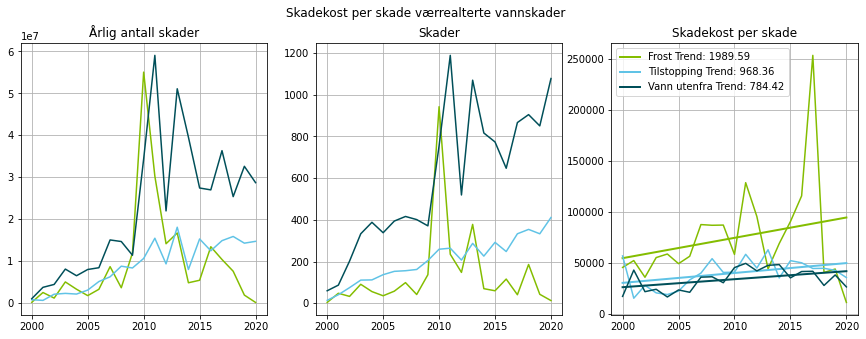

In [33]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
titles = ['Årlig antall skader','Skader','Skadekost per skade']
fig.suptitle('Skadekost per skade værrealterte vannskader')
colors = [grønn,blå,sjøgrønn]
for i,j in enumerate(cols):
  ax[2].plot(år,dtt[cols[i]]/dt[cols[i]],color=colors[i])
  ax[2].plot(når, pred[i],color=colors[i] , linewidth=2,
             label=str(cols[i])+' Trend: '+str(stigning[i]))
  ax[0].plot(år,dtt[cols[i]],label=cols[i],color=colors[i])
  ax[1].plot(år,dt[cols[i]],label=cols[i],color=colors[i])
  ax[i].set_title(titles[i])
  ax[i].grid()
plt.legend()
plt.show()

In [63]:
#check significanse. p<0.05 is significant. combined with large R squared value
#means actual trend represntative for the population

X = når
y = nkost
#X2 = sm.add_constant(X) #ikke sikker hva denne gjør. 
est = sm.OLS(y, X) #her skal det stå X2 i stedet fro X
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.3
Date:                Mon, 07 Jun 2021   Prob (F-statistic):                    3.04e-12
Time:                        07:53:49   Log-Likelihood:                         -223.90
No. Observations:                  21   AIC:                                      449.8
Df Residuals:                      20   BIC:                                      450.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [64]:
est2.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
x1,17.024075,1.149485,14.81018,3.042881e-12,14.626292,19.421858


In [25]:
#test with random numbers
x = np.arange(1,7).reshape(-1,1)
y = np.array([9,1,7,9,12,10]).reshape(-1,1)
#y = np.random.rand(10).reshape(-1,1)
reg = LinearRegression()
#nkost = np.array(dtt[cols[i]]/dt[cols[i]]).reshape(-1,1)
#når = år.reshape(-1,1)
reg.fit(x,y)
predictions = reg.predict(x)
predictions


array([[ 5.14285714],
       [ 6.28571429],
       [ 7.42857143],
       [ 8.57142857],
       [ 9.71428571],
       [10.85714286]])

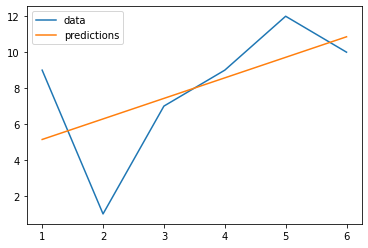

In [27]:
plt.figure()
plt.plot(x,y,label='data')
plt.plot(x,predictions,label='predictions')
plt.legend()
plt.show()

In [26]:
#p-value
est = sm.OLS(y, x) #her skal det stå X2 i stedet fro X
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                              28.73
Date:                Mon, 07 Jun 2021   Prob (F-statistic):                     0.00304
Time:                        13:42:58   Log-Likelihood:                         -15.779
No. Observations:                   6   AIC:                                      33.56
Df Residuals:                       5   BIC:                                      33.35
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [29]:
(predictions[-1]-predictions[0])/6

array([0.95238095])